In [204]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

In [206]:
df = pd.read_csv(r"C:\Users\Shree\Downloads\DS_Assignment - internship\Screening Test - DS\iris.csv")

In [207]:
df.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [208]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

C:\Users\Shree\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


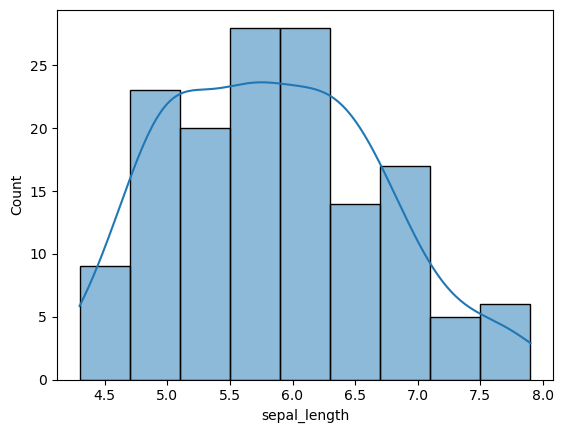

In [209]:
sns.histplot(df.sepal_length, kde=True)
plt.show()

C:\Users\Shree\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


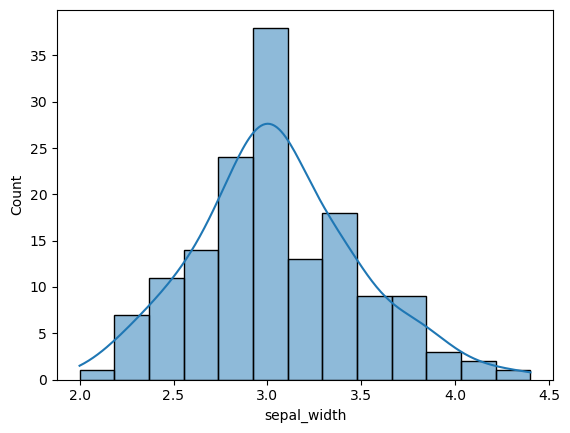

In [210]:
sns.histplot(df.sepal_width, kde=True)
plt.show()

In [212]:
sns.histplot(df.petal_length, kde=True)
plt.show()

C:\Users\Shree\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [214]:
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [215]:
from sklearn.preprocessing import LabelEncoder

In [216]:
le = LabelEncoder()

In [219]:
df['species'] = le.fit_transform(df['species'])

In [220]:
df.head()

sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

In [221]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [223]:
df

sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
5             5.4          3.9           1.7          0.4        0
6             4.6          3.4           1.4          0.3        0
7             5.0          3.4           1.5          0.2        0
8             4.4          2.9           1.4          0.2        0
9             4.9          3.1           1.5          0.1        0
10            5.4          3.7           1.5          0.2        0
11            4.8          3.4           1.6          0.2        0
12            4.8          3.0           1.4          0.1        0
13            4.3          3.0           1.1          0.1        0
14            5.8          4.0           1.2          0.2        0
15            5.7          4.4           1.5          0.4        0
16            5.4          3.9           1.3          0.4        0
17            5.1          3.5           1.4          0.3        0
18            5.7          3.8           1.7          0.3        0
19            5.1          3.8           1.5          0.3        0
20            5.4          3.4           1.7          0.2        0
21            5.1          3.7           1.5          0.4        0
22            4.6          3.6           1.0          0.2        0
23            5.1          3.3           1.7          0.5        0
24            4.8          3.4           1.9          0.2        0
25            5.0          3.0           1.6          0.2        0
26            5.0          3.4           1.6          0.4        0
27            5.2          3.5           1.5          0.2        0
28            5.2          3.4           1.4          0.2        0
29            4.7          3.2           1.6          0.2        0
30            4.8          3.1           1.6          0.2        0
31            5.4          3.4           1.5          0.4        0
32            5.2          4.1           1.5          0.1        0
33            5.5          4.2           1.4          0.2        0
34            4.9          3.1           1.5          0.1        0
35            5.0          3.2           1.2          0.2        0
36            5.5          3.5           1.3          0.2        0
37            4.9          3.1           1.5          0.1        0
38            4.4          3.0           1.3          0.2        0
39            5.1          3.4           1.5          0.2        0
40            5.0          3.5           1.3          0.3        0
41            4.5          2.3           1.3          0.3        0
42            4.4          3.2           1.3          0.2        0
43            5.0          3.5           1.6          0.6        0
44            5.1          3.8           1.9          0.4        0
45            4.8          3.0           1.4          0.3        0
46            5.1          3.8           1.6          0.2        0
47            4.6          3.2           1.4          0.2        0
48            5.3          3.7           1.5          0.2        0
49            5.0          3.3           1.4          0.2        0
50            7.0          3.2           4.7          1.4        1
51            6.4          3.2           4.5          1.5        1
52            6.9          3.1           4.9          1.5        1
53            5.5          2.3           4.0          1.3        1
54            6.5          2.8           4.6          1.5        1
55            5.7          2.8           4.5          1.3        1
56            6.3          3.3           4.7          1.6        1
57            4.9          2.4           3.3          1.0        1
58            6.6          2.9           4.6        

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [225]:
with open(r"C:\Users\Shree\Downloads\DS_Assignment - internship\Screening Test - DS\file.json.txt", 'r') as file:
    config = json.load(file)


In [226]:
target_column = config['design_state_data']['target']['target']
prediction_type = config['design_state_data']['target']['prediction_type']
algorithms = config['design_state_data']['algorithms']
hyperparameters = config['design_state_data']['hyperparameters']


In [227]:
print(target_column)
print(prediction_type)
print(hyperparameters)

petal_width
Regression
{'strategy': 'Grid Search', 'shuffle_grid': True, 'random_state': 1, 'max_iterations': 2, 'max_search_time': 3, 'parallelism': 5, 'cross_validation_strategy': 'Time-based K-fold(with overlap)', 'num_of_folds': 6, 'split_ratio': 0, 'stratified': True}


In [228]:
X = df.drop(columns=[target_column])
y = df[target_column]

In [230]:
model_dict = {
    'RandomForestRegressor': RandomForestRegressor,
    'GBTRegressor': GradientBoostingRegressor,
    'LinearRegression': LinearRegression,
    'RidgeRegression': Ridge,
    'LassoRegression': Lasso,
    'ElasticNetRegression': ElasticNet
}

In [231]:
def get_hyperparameters(model_name, config):
    model_config = config['design_state_data']['algorithms'][model_name]
    if model_name == 'RandomForestRegressor':
        return {
            'n_estimators': range(model_config['min_trees'], model_config['max_trees'] + 1, 5),
            'max_depth': range(model_config['min_depth'], model_config['max_depth'] + 1, 5),
            'min_samples_leaf': range(model_config['min_samples_per_leaf_min_value'], 
                                       model_config['min_samples_per_leaf_max_value'] + 1)
        }
    elif model_name == 'GBTRegressor':
        return {
            'n_estimators': model_config['num_of_BoostingStages'],
            'learning_rate': [model_config['min_stepsize'], model_config['max_stepsize']],
            'max_depth': range(model_config['min_depth'], model_config['max_depth'] + 1)
        }
    elif model_name == 'LinearRegression':
        return {
            'fit_intercept': [True, False],
        }
    elif model_name in ['RidgeRegression', 'LassoRegression', 'ElasticNetRegression']:
        return {
            'alpha': [model_config['min_regparam'], model_config['max_regparam']],
            'max_iter': range(model_config['min_iter'], model_config['max_iter'] + 1, 10)
        }
    return {}

In [232]:
selected_models = []
model_hyperparams = {}
for model_name, model_config in algorithms.items():
    if model_config.get('is_selected', False):
        selected_models.append(model_dict[model_name])
        model_hyperparams[model_name] = get_hyperparameters(model_name, config)



In [233]:
def train_model(model, X_train, y_train, hyperparameters):
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()), 
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, {'model__' + k: v for k, v in hyperparameters.items()}, 
                               cv=TimeSeriesSplit(n_splits=5), n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [235]:
for model_class in selected_models:
    model_name = model_class.__name__
    print(f"Training {model_name}...")
    
    model = model_class()
    hyperparameters = model_hyperparams.get(model_name, {})
    best_model = train_model(model, X_train, y_train, hyperparameters)
    
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Best Params: {best_model.get_params()}")
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Score: {r2}\n")

Training RandomForestRegressor...
Model: RandomForestRegressor
Best Params: {'memory': None, 'steps': [('scaler', MinMaxScaler()), ('model', RandomForestRegressor(max_depth=20, min_samples_leaf=5, n_estimators=20))], 'verbose': False, 'scaler': MinMaxScaler(), 'model': RandomForestRegressor(max_depth=20, min_samples_leaf=5, n_estimators=20), 'scaler__clip': False, 'scaler__copy': True, 'scaler__feature_range': (0, 1), 'model__bootstrap': True, 'model__ccp_alpha': 0.0, 'model__criterion': 'squared_error', 'model__max_depth': 20, 'model__max_features': 1.0, 'model__max_leaf_nodes': None, 'model__max_samples': None, 'model__min_impurity_decrease': 0.0, 'model__min_samples_leaf': 5, 'model__min_samples_split': 2, 'model__min_weight_fraction_leaf': 0.0, 'model__n_estimators': 20, 'model__n_jobs': None, 'model__oob_score': False, 'model__random_state': None, 'model__verbose': 0, 'model__warm_start': False}
Mean Squared Error: 0.03210389638909959
R2 Score: 0.9494948229296271

